In [1]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path to models folder
model_path = "./models"

# Load our Neural Transfer Models
model_paths = [f for f in os.listdir(model_path) if os.path.isfile(os.path.join(model_path, f))]

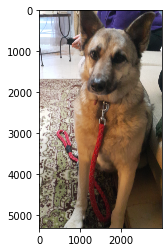

In [3]:
# Load base image
img = cv2.imread("./images/Yuki.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
# Total of 9 style images
style_images = os.listdir("./art")
len(style_images)

9

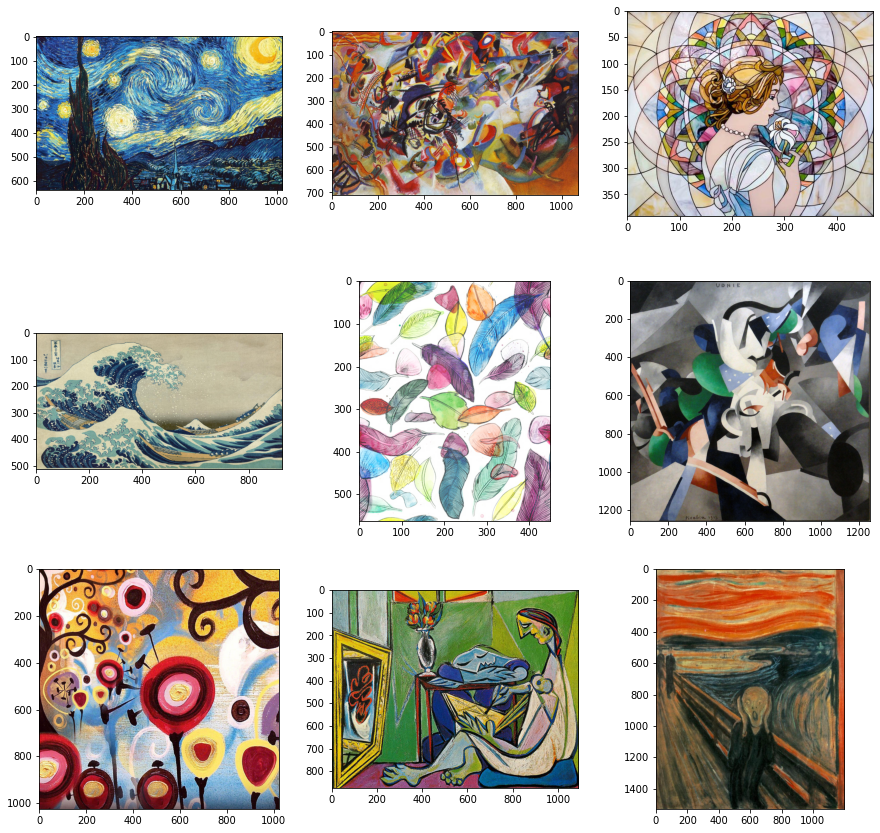

In [5]:
# Load style images
style_images = np.array(style_images)
style_images = style_images.reshape(3, 3)

fig, axs = plt.subplots(3, 3, figsize = (15, 15))
for i in range(3):
    for j in range(3):
        path = os.path.join("./art", style_images[i, j])
        img_st = cv2.imread(path)
        img_st = cv2.cvtColor(img_st, cv2.COLOR_BGR2RGB)
        axs[i, j].imshow(img_st)

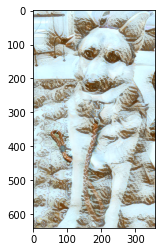

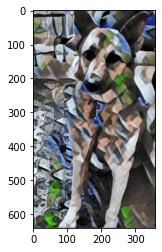

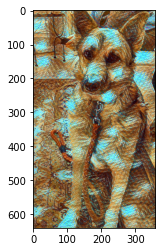

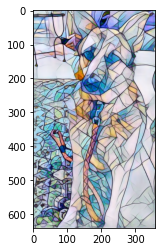

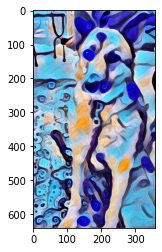

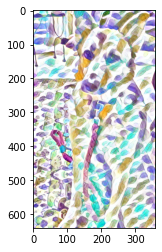

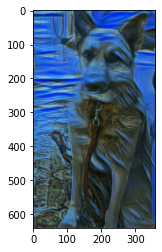

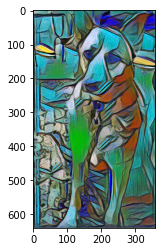

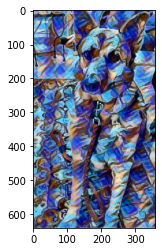

In [6]:
for i, mod in enumerate(model_paths):
    style = cv2.imread("./art/" + str(mod)[:-3] + ".jpg")

    # Load our Neural Transfer Style Model
    model_neural = cv2.dnn.readNetFromTorch(os.path.join(model_path, mod))

    # Resize it to fix height. You can change it as you want
    height, width = img.shape[0], img.shape[1]
    new_height = 640
    new_width = int((new_height/height) * width)
    
    new_img = cv2.resize(
        img, 
        (new_width, new_height),
        interpolation = cv2.INTER_AREA
    )

    # Create our blob from the image
    # Then perform a forward pass run of the network
    # The Mean values for the ImageNet 
    R, G, B = 103.93, 116.77, 123.68
    input_blob = cv2.dnn.blobFromImage(
        new_img,
        1,
        (new_width, new_height),
        (R, G, B),
        swapRB = False,
        crop = False
    )
    model_neural.setInput(input_blob)
    output = model_neural.forward()
    
    # Reshape the output Tensor, 
    # add back the mean substruction,
    # re-order the channels
    output = output.reshape(output.shape[1], output.shape[2], output.shape[3])
    output[0] += R
    output[1] += G
    output[2] += B
    
    output /= 255
    output = output.clip(0, 1)
    output = output.transpose(1, 2, 0)
    
    # Display image
    plt.figure(i)
    plt.imshow(output)